In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
import dspy
import litellm
from prometheus_eval.litellm import LiteLLM

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer()

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
llama31_70b_litellm = LiteLLM('openai/meta-llama/Meta-Llama-3.1-70b-Instruct', api_base="http://future-hgx-1:7410/v1", api_key='None') # VLLM endpoint

In [6]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Answer the user query as a helpful chatbot assistant.", proposer_model=llama31_70b, judge_model=llama31_70b_litellm)

In [7]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [8]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column))

In [9]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [10]:
for metric in new_metrics_final:
    metric.display()

,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Relevance: The ability of the output to stay on topic and address the given prompt.,"A score of 1 indicates that the response is completely off-topic and fails to address the input prompt. The response may be unrelated to the subject matter, or it may provide unnecessary information that is not relevant to the prompt.","A score of 2 indicates that the response is somewhat off-topic, but may provide some tangential information that is loosely related to the prompt. The response may be overly verbose or provide unnecessary details that detract from the main topic.","A score of 3 indicates that the response is partially relevant, but may not fully address the input prompt. The response may provide some useful information, but may also include unnecessary details or tangents that detract from the main topic.","A score of 4 indicates that the response is mostly relevant and provides useful information that directly addresses the input prompt. The response may be concise and to the point, but may also include some minor tangents or unnecessary details.","A score of 5 indicates that the response is highly relevant and provides a clear, concise, and direct answer to the input prompt. The response is on-topic, provides useful information, and is free of unnecessary details or tangents."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Completeness: The extent to which the output provides a thorough and detailed answer to the prompt.,"A score of 1 indicates that the response is incomplete and lacks essential information. The output may be brief, vague, or fail to address key aspects of the prompt. A response scoring 1 may demonstrate a limited understanding of the topic or may not provide sufficient detail to be considered a complete answer.",A score of 2 indicates that the response is partially complete but lacks significant information or clarity. The output may address some aspects of the prompt but omit important details or fail to provide a clear explanation. A response scoring 2 may demonstrate a basic understanding of the topic but may not provide sufficient depth or breadth to be considered a complete answer.,A score of 3 indicates that the response is generally complete but may lack some details or clarity. The output may address most aspects of the prompt but may omit some important information or provide a somewhat vague explanation. A response scoring 3 may demonstrate a good understanding of the topic but may not provide sufficient depth or breadth to be considered a comprehensive answer.,"A score of 4 indicates that the response is mostly complete and provides a good level of detail and clarity. The output may address all aspects of the prompt and provide a clear explanation, but may lack some nuance or depth. A response scoring 4 may demonstrate a strong understanding of the topic and provide a comprehensive answer, but may not be perfect in terms of detail or clarity.","A score of 5 indicates that the response is complete, providing a thorough and detailed answer to the prompt. The output addresses all aspects of the question, provides relevant information, and demonstrates a clear and comprehensive understanding of the topic. A response scoring 5 is well-written, clear, and concise, and provides a complete and accurate answer to the prompt."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Contextual understanding: The ability of the output to demonstrate an understanding of the context and background information provided.,Score 1: The model's output demonstrates little to no understanding of the context. It may provide a generic or irrelevant response that does not take into account the background information provided.,"Score 2: The model's output shows some understanding of the context, but it is limited or superficial. It may identify some relevant information, but fails to recognize relationships between different pieces of information or use the context to inform its response.","Score 3: The model's output demonstrates a moderate understanding of the context. It may identify relevant information, recognize some relationships between different pieces of information, and use the context to inform its response, but may not fully capture the nuances and implications of the context.","Score 4: The model's output shows a strong understanding of the context. It identifies relevant information, recognizes relationships between different pieces of information, and uses the context to inform its response. It may also demonstrate an understanding of the nuances and implications of the context, but may not fully capture the subtleties of the topic.","Score 5: The model's output demonstrates an exceptional understanding of the context. It identifies all relevant information, recognizes complex relationships between different pieces of information, and uses the context to inform its response. It also demonstrates a deep understanding of the nuances and implications of the context, and provides a response that is insightful and informative."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"Tone: The level of formality, sincerity, and respect in the output, avoiding sarcasm and glibness.","A score of 1 indicates that the tone is completely off, with a high level of sarcasm, glibness, or disrespect. The output may come across as unhelpful, dismissive, or even rude, making the reader feel uncomfortable or undervalued.","A score of 2 indicates that the tone is somewhat off, with a noticeable level of sarcasm, glibness, or informality. The output may come across as slightly unhelpful or dismissive, but still attempts to provide some level of assistance.","A score of 3 indicates that the tone is neutral, with a moderate level of formality and sincerity. The output is somewhat helpful, but may lack a clear and engaging tone, making it feel somewhat generic or uninteresting.","A score of 4 indicates that the tone is good, with a high level of formality, sincerity, and respect. The output is helpful, engaging, and makes the reader feel valued and comfortable. However, there may be some minor issues with the tone, such as a slight hint of sarcasm or informality.","A score of 5 indicates that the tone is excellent, with a perfect balance of formality, sincerity, and respect. The output is highly engaging, professional, and makes the reader feel comfortable and valued. The tone is polished and refined, with no noticeable issues or areas for improvement."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"Coherence: The clarity and logical flow of the output, making it easy to understand.","A score of 1 indicates that the output is incoherent and lacks logical flow. The output may be disjointed, with sentences or paragraphs that do not relate to each other. The language may be ambiguous, making it difficult to understand the intended meaning. The output may also be overly verbose, with unnecessary words or phrases that detract from the overall clarity.","A score of 2 indicates that the output is somewhat incoherent, with some logical flow but also some areas of confusion. The output may be poorly organized, with sentences or paragraphs that do not follow a clear structure. The language may be somewhat ambiguous, with some words or phrases that are unclear. However, the overall meaning of the output may still be discernible with some effort.","A score of 3 indicates that the output is moderately coherent, with a clear structure and logical flow. The output may be well-organized, with sentences or paragraphs that follow a clear and logical sequence. The language may be clear and concise, with few areas of ambiguity. However, the output may still contain some minor errors or areas of confusion.","A score of 4 indicates that the output is highly coherent, with a clear and logical structure. The output may be well-organized, with sentences or paragraphs that follow a clear and logical sequence. The language may be clear and concise, with few areas of ambiguity. The output may also be engaging and easy to read, with a clear and concise writing style.","A score of 5 indicates that the output is exceptionally coherent, with a clear and logical structure that is easy to follow. The output may be extremely well-organized, with sentences or paragraphs that follow a clear and logical sequence. The language may be clear and concise, with no areas of ambiguity. The output may also be engaging and easy to read, with a clear and concise writing style that is free of errors."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Accuracy**: The output's factual correctness, precision, and attention to detail, ensuring that the information provided is reliable.","A score of 1 indicates that the output is completely inaccurate, containing numerous factual errors, and lacks attention to detail. The information provided is unreliable and may be misleading.","A score of 2 indicates that the output contains some inaccuracies, with a few factual errors and a lack of attention to detail in certain areas. While some information may be correct, the output is not entirely reliable.","A score of 3 indicates that the output is partially accurate, with some correct information and some minor errors or inaccuracies. The output shows some attention to detail but may lack precision in certain areas.","A score of 4 indicates that the output is mostly accurate, with a high degree of factual correctness and attention to detail. However, there may be some minor errors or inaccuracies that do not significantly impact the overall reliability of the information.","A score of 5 indicates that the output is entirely accurate, with a high degree of factual correctness, precision, and attention to detail. The information provided is reliable and trustworthy, with no errors or inaccuracies."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Engagement**: The output's ability to capture the reader's attention, using tone, language, and style to convey enthusiasm and interest in the topic.","A score of 1 indicates that the output lacks engagement, tone, and style. The language is dull, and the content fails to capture the reader's attention. The output may be too formal, too long, or too boring, leading to a lack of interest in the topic.","A score of 2 indicates that the output shows some attempt at engagement, but it falls short. The tone may be somewhat formal, and the language may be somewhat dry. The content may be mildly interesting, but it fails to capture the reader's attention fully. The output may lack variety in sentence structure, vocabulary, or style.","A score of 3 indicates that the output is moderately engaging. The tone is somewhat informal, and the language is clear and concise. The content is somewhat interesting, and the output shows some attempt at using rhetorical devices, such as metaphors or allusions. However, the output may lack depth, and the language may not be particularly vivid or engaging.","A score of 4 indicates that the output is engaging and well-written. The tone is informal and conversational, and the language is vivid and engaging. The content is interesting, and the output shows a good use of rhetorical devices, such as metaphors, allusions, or repetition. The output may use humor, irony, or other literary devices to capture the reader's attention.","A score of 5 indicates that the output is highly engaging and exceptionally well-written. The tone is informal and conversational, and the language is vivid, engaging, and memorable. The content is fascinating, and the output shows a masterful use of rhetorical devices, such as metaphors, allusions, or repetition. The output may use humor, irony, or other literary devices to capture the reader's attention and leave a lasting impression."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Informative value**: The amount of useful and accurate information provided in the output, with good examples providing detailed and accurate information and bad examples providing incomplete or inaccurate information.","A score of 1 indicates that the output provides little to no useful information. The response may be incomplete, inaccurate, or lack relevant details.","A score of 2 indicates that the output provides some useful information, but it is incomplete or lacks relevant details. The response may be partially accurate, but it does not fully address the task or prompt.","A score of 3 indicates that the output provides some useful information, but it is not entirely accurate or lacks relevant details. The response may be partially complete, but it does not fully address the task or prompt.","A score of 4 indicates that the output provides a good amount of useful and accurate information. The response is mostly complete and addresses the task or prompt, but it may lack some relevant details or have minor inaccuracies.","A score of 5 indicates that the output provides a high amount of useful and accurate information. The response is complete, accurate, and fully addresses the task or prompt, providing all relevant details and information."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Grammar and syntax**: The quality of the grammar and syntax used in the output, with good examples using proper grammar and syntax and bad examples using poor grammar and syntax.","A score of 1 indicates that the output contains severe grammatical errors, making it difficult to understand. The output may contain multiple errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure. The errors are so severe that they hinder the reader's ability to comprehend the intended meaning.","A score of 2 indicates that the output contains noticeable grammatical errors, but the meaning is still clear. The output may contain errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure, but they do not significantly impede the reader's understanding. The errors are noticeable but do not dominate the text.","A score of 3 indicates that the output contains some minor grammatical errors, but the meaning is clear. The output may contain a few errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure, but they do not significantly affect the reader's understanding. The errors are minor and do not detract from the overall quality of the text.","A score of 4 indicates that the output contains only a few minor errors, and the meaning is clear. The output may contain a single error or a few very minor errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure, but they do not affect the reader's understanding. The errors are very minor and do not detract from the overall quality of the text.","A score of 5 indicates that the output is free of grammatical errors and is well-written. The output demonstrates a strong command of grammar and syntax, with no errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure. The text is clear, concise, and well-organized, making it easy for the reader to understand the intended meaning."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Conciseness: The ability of the model to provide clear and concise responses that directly address the user's query.,"A score of 1 indicates that the model's response is overly verbose and fails to effectively communicate the necessary information. The response may contain irrelevant details, repetitive phrases, or unnecessary tangents that detract from the main point.","A score of 2 indicates that the model's response is somewhat concise but still contains some unnecessary information. The response may be slightly wordy or contain a few irrelevant details, but it still manages to convey the main point.","A score of 3 indicates that the model's response is generally concise and effectively communicates the necessary information. The response may contain a few minor flaws, such as a slight redundancy or a brief tangent, but overall, it is clear and to the point.",A score of 4 indicates that the model's response is very concise and effectively communicates the necessary information in a clear and direct manner. The response is well-structured and free of unnecessary words or phrases.,"A score of 5 indicates that the model's response is extremely concise and effectively communicates the necessary information in a clear and direct manner. The response is perfectly structured, and every word is essential to conveying the main point."


In [11]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  18%|█▊        | 180/1000 [00:00<00:00, 1781.93it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10


Processing Items:  36%|███▌      | 359/1000 [00:00<00:01, 550.41it/s] 

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10


Processing Items:  46%|████▌     | 455/1000 [00:00<00:01, 444.95it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10


Processing Items:  52%|█████▏    | 521/1000 [00:01<00:01, 349.45it/s]

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10


Processing Items:  57%|█████▋    | 570/1000 [00:01<00:01, 283.92it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10


Processing Items:  63%|██████▎   | 634/1000 [00:02<00:02, 161.66it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 371.30it/s]


Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10


Processing Items:  16%|█▌        | 158/1000 [00:00<00:00, 1494.70it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:  39%|███▉      | 389/1000 [00:00<00:01, 434.37it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10


Processing Items:  53%|█████▎    | 534/1000 [00:01<00:01, 242.73it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10


Processing Items:  95%|█████████▍| 949/1000 [00:02<00:00, 662.04it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 387.89it/s]


Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  58%|█████▊    | 582/1000 [00:01<00:01, 368.96it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10


Processing Items:  66%|██████▌   | 656/1000 [00:01<00:01, 213.05it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10


Processing Items:  71%|███████   | 707/1000 [00:02<00:02, 146.34it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 366.89it/s]


Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying

Processing Items:  12%|█▏        | 122/1000 [00:00<00:00, 1182.59it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10


Processing Items:  24%|██▍       | 241/1000 [00:00<00:01, 446.36it/s] 

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10


Processing Items:  31%|███       | 308/1000 [00:00<00:01, 407.40it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10


Processing Items:  40%|████      | 400/1000 [00:01<00:03, 165.50it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10


Processing Items:  43%|████▎     | 427/1000 [00:01<00:03, 161.87it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 3/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10


Processing Items:  45%|████▌     | 450/1000 [00:02<00:03, 138.39it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10


Processing Items:  49%|████▉     | 494/1000 [00:02<00:05, 88.06it/s] 

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 10/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10

Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 341.69it/s]



Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying

Processing Items:   0%|          | 0/1000 [00:00<?, ?it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10


Processing Items:  12%|█▎        | 125/1000 [00:00<00:00, 1010.18it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying fai

Processing Items:  43%|████▎     | 431/1000 [00:01<00:01, 296.39it/s] 

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying 

Processing Items:  47%|████▋     | 469/1000 [00:01<00:01, 295.38it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10


Processing Items:  58%|█████▊    | 582/1000 [00:03<00:04, 87.08it/s] 

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying fa

Processing Items:  60%|██████    | 605/1000 [00:03<00:05, 68.09it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying fai

Processing Items:  98%|█████████▊| 982/1000 [00:03<00:00, 560.09it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying

Processing Items: 100%|██████████| 1000/1000 [00:04<00:00, 244.46it/s]


Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  13%|█▎        | 132/1000 [00:00<00:00, 1193.82it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:  32%|███▏      | 322/1000 [00:00<00:01, 413.27it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10


Processing Items:  42%|████▏     | 420/1000 [00:01<00:02, 266.45it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10


Processing Items:  48%|████▊     | 482/1000 [00:01<00:03, 132.43it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10


Processing Items:  83%|████████▎ | 829/1000 [00:02<00:00, 503.29it/s]

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10


Processing Items: 100%|██████████| 1000/1000 [00:03<00:00, 330.40it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  34%|███▎      | 336/1000 [00:00<00:00, 3129.81it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10


Processing Items:  65%|██████▍   | 649/1000 [00:01<00:00, 528.10it/s] 

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10


Processing Items:  80%|███████▉  | 797/1000 [00:01<00:00, 456.06it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 441.67it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



Processing Items:  23%|██▎       | 232/1000 [00:00<00:02, 382.91it/s]

Retrying failed batches: Attempt 1/10


Processing Items:  31%|███       | 312/1000 [00:01<00:03, 220.72it/s]

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  37%|███▋      | 374/1000 [00:02<00:06, 99.61it/s] 

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10


Processing Items:  85%|████████▍ | 847/1000 [00:02<00:00, 606.42it/s]

Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10


Processing Items: 100%|██████████| 1000/1000 [00:03<00:00, 300.09it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10


Processing Items:   0%|          | 0/1000 [00:00<?, ?it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10


Processing Items:  21%|██        | 212/1000 [00:00<00:00, 2086.69it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 3/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10



Processing Items:  42%|████▏     | 421/1000 [00:01<00:01, 363.03it/s] 

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying fai

Processing Items:  52%|█████▏    | 521/1000 [00:01<00:01, 338.18it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying f

Processing Items:  59%|█████▉    | 589/1000 [00:01<00:01, 291.65it/s]

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying f

Processing Items:  68%|██████▊   | 675/1000 [00:02<00:01, 242.89it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying

Processing Items:  73%|███████▎  | 730/1000 [00:02<00:01, 139.16it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying fa

Processing Items:  75%|███████▍  | 748/1000 [00:03<00:01, 140.37it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10


Processing Items:  99%|█████████▉| 989/1000 [00:03<00:00, 445.42it/s]

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retryi

Processing Items: 100%|██████████| 1000/1000 [00:03<00:00, 297.97it/s]

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying fa

Processing Items:  76%|███████▋  | 765/1000 [00:00<00:00, 7583.49it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying fai

Processing Items: 100%|██████████| 1000/1000 [00:00<00:00, 1030.10it/s]

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retryi


Processing Items:  37%|███▋      | 372/1000 [00:00<00:01, 327.84it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  51%|█████▏    | 513/1000 [00:01<00:01, 262.03it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10


Processing Items:  59%|█████▉    | 589/1000 [00:02<00:03, 124.96it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 370.87it/s]


Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  60%|██████    | 600/1000 [00:01<00:00, 431.31it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  81%|████████▏ | 813/1000 [00:02<00:00, 228.16it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 401.90it/s]


Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10


Processing Items:  14%|█▍        | 145/1000 [00:00<00:00, 1197.92it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10


Processing Items:  33%|███▎      | 334/1000 [00:00<00:01, 428.64it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  43%|████▎     | 431/1000 [00:01<00:02, 258.78it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10


Processing Items:  51%|█████     | 511/1000 [00:01<00:02, 175.43it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10


Processing Items:  56%|█████▌    | 561/1000 [00:02<00:04, 95.25it/s] 

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying f

Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 361.54it/s]


Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying 

Processing Items:   0%|          | 0/1000 [00:00<?, ?it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  31%|███▏      | 314/1000 [00:00<00:00, 2924.99it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10


Processing Items:  61%|██████    | 607/1000 [00:01<00:00, 498.14it/s] 

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10


Processing Items:  75%|███████▍  | 746/1000 [00:01<00:00, 444.85it/s]

Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10


Processing Items:  84%|████████▍ | 838/1000 [00:01<00:00, 404.88it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 438.15it/s]


Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying

Processing Items:   0%|          | 0/1000 [00:00<?, ?it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10


Processing Items:  16%|█▌        | 157/1000 [00:00<00:00, 1528.41it/s]

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10


Processing Items:  31%|███       | 310/1000 [00:00<00:01, 435.11it/s] 

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10


Processing Items:  45%|████▍     | 446/1000 [00:01<00:01, 281.68it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying fa

Processing Items:  54%|█████▍    | 543/1000 [00:02<00:02, 176.04it/s]

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying 

Processing Items:  58%|█████▊    | 580/1000 [00:03<00:05, 76.39it/s] 

Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying fa

Processing Items: 100%|██████████| 1000/1000 [00:03<00:00, 279.70it/s]

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retryi


Processing Items:  28%|██▊       | 280/1000 [00:00<00:01, 454.73it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10


Processing Items:  38%|███▊      | 378/1000 [00:01<00:02, 282.58it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10


Processing Items:  48%|████▊     | 477/1000 [00:02<00:04, 127.26it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying fai

Processing Items:  52%|█████▏    | 517/1000 [00:02<00:05, 87.32it/s] 

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying f

Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 342.28it/s]


Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying fai

Processing Items:  64%|██████▍   | 641/1000 [00:00<00:00, 5958.19it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10


Processing Items: 100%|██████████| 1000/1000 [00:01<00:00, 836.66it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying fai


Processing Items:  16%|█▌        | 161/1000 [00:00<00:00, 1596.48it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10


Processing Items:  41%|████      | 406/1000 [00:00<00:01, 431.77it/s] 

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10


Processing Items:  55%|█████▌    | 550/1000 [00:01<00:01, 273.42it/s]

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10


Processing Items:  63%|██████▎   | 628/1000 [00:02<00:02, 134.06it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 360.17it/s]


Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying

Processing Items:   0%|          | 0/1000 [00:00<?, ?it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10


Processing Items:  12%|█▏        | 123/1000 [00:00<00:00, 1127.43it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10


Processing Items:  24%|██▎       | 236/1000 [00:00<00:01, 433.18it/s] 

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10


Processing Items:  35%|███▍      | 349/1000 [00:00<00:02, 293.90it/s]

Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10


Processing Items:  39%|███▊      | 386/1000 [00:01<00:02, 214.39it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retryin

Processing Items:  45%|████▌     | 451/1000 [00:02<00:05, 107.20it/s]

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying f

Processing Items:  47%|████▋     | 474/1000 [00:03<00:09, 56.09it/s] 

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying fa

Processing Items:  99%|█████████▉| 992/1000 [00:03<00:00, 582.38it/s]

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1000/1000 [00:03<00:00, 286.42it/s]

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10


Retrying failed batches: Attempt 1/10


Processing Items:  11%|█         | 108/1000 [00:00<00:02, 400.82it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10


Processing Items:  20%|██        | 202/1000 [00:00<00:02, 280.78it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10


Processing Items:  28%|██▊       | 278/1000 [00:01<00:04, 149.99it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10


Processing Items:  32%|███▏      | 323/1000 [00:01<00:07, 95.49it/s] 

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10


Processing Items:  84%|████████▍ | 844/1000 [00:02<00:00, 511.17it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying f

Processing Items: 100%|██████████| 1000/1000 [00:03<00:00, 297.68it/s]


Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying 

Processing Items:   0%|          | 0/1789 [00:00<?, ?it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10


Processing Items:   7%|▋         | 130/1789 [00:00<00:01, 1097.87it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10


Processing Items:  17%|█▋        | 306/1789 [00:00<00:03, 423.80it/s] 

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10


Processing Items:  22%|██▏       | 397/1789 [00:01<00:07, 184.35it/s]

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10


Processing Items:  25%|██▌       | 449/1789 [00:02<00:11, 118.58it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10


Processing Items:  28%|██▊       | 504/1789 [00:02<00:15, 81.86it/s] 

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10


Processing Items:  29%|██▉       | 522/1789 [00:03<00:24, 51.30it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10


Processing Items:  30%|███       | 542/1789 [00:04<00:41, 30.13it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying

Processing Items:  31%|███       | 552/1789 [00:05<01:03, 19.59it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1789/1789 [00:05<00:00, 332.29it/s] 


Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:   0%|          | 0/1789 [00:00<?, ?it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items:  10%|▉         | 170/1789 [00:00<00:01, 1298.83it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10


Processing Items:  17%|█▋        | 300/1789 [00:00<00:03, 478.07it/s] 

Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10


Processing Items:  23%|██▎       | 419/1789 [00:01<00:05, 239.84it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10


Processing Items:  27%|██▋       | 480/1789 [00:01<00:07, 174.89it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10


Processing Items:  30%|██▉       | 536/1789 [00:02<00:14, 88.39it/s] 

Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10


Processing Items:  67%|██████▋   | 1201/1789 [00:03<00:00, 913.62it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying 

Processing Items:  81%|████████  | 1441/1789 [00:04<00:00, 557.50it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10


Processing Items:  89%|████████▉ | 1591/1789 [00:04<00:00, 404.08it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10


Processing Items: 100%|██████████| 1789/1789 [00:05<00:00, 346.78it/s]


Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:   6%|▋         | 114/1789 [00:00<00:01, 1124.14it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  16%|█▋        | 293/1789 [00:00<00:04, 337.85it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10


Processing Items:  21%|██        | 373/1789 [00:01<00:08, 166.10it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10


Processing Items:  25%|██▍       | 447/1789 [00:02<00:11, 113.66it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10


Processing Items:  27%|██▋       | 487/1789 [00:03<00:23, 56.22it/s] 

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10


Processing Items:  79%|███████▉  | 1420/1789 [00:04<00:00, 1175.56it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10


Processing Items:  93%|█████████▎| 1671/1789 [00:04<00:00, 689.62it/s] 

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1789/1789 [00:05<00:00, 337.33it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



Processing Items:  15%|█▍        | 263/1789 [00:00<00:03, 483.30it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  21%|██▏       | 382/1789 [00:01<00:06, 219.60it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10


Processing Items:  26%|██▋       | 470/1789 [00:02<00:10, 122.24it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying fai

Processing Items:  28%|██▊       | 505/1789 [00:03<00:14, 85.72it/s] 

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retryi

Processing Items:  31%|███       | 552/1789 [00:04<00:45, 27.41it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 10/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying fa

Processing Items:  31%|███       | 559/1789 [00:05<01:11, 17.14it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying fa

Processing Items: 100%|██████████| 1789/1789 [00:05<00:00, 311.40it/s] 


Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retryi

Processing Items:   0%|          | 0/1789 [00:00<?, ?it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying fai

Processing Items:   6%|▋         | 114/1789 [00:00<00:01, 1061.17it/s]

Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10


Processing Items:  12%|█▏        | 221/1789 [00:00<00:04, 385.95it/s] 

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10


Processing Items:  18%|█▊        | 325/1789 [00:00<00:05, 292.59it/s]

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying f

Processing Items:  23%|██▎       | 416/1789 [00:01<00:06, 205.11it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying

Processing Items:  24%|██▍       | 438/1789 [00:01<00:07, 175.49it/s]

Retrying failed batches: Attempt 8/10Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying fa

Processing Items:  28%|██▊       | 502/1789 [00:03<00:19, 64.96it/s] 

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying fa

Processing Items:  29%|██▊       | 510/1789 [00:03<00:24, 52.31it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying f

Processing Items:  29%|██▉       | 516/1789 [00:04<00:54, 23.33it/s]

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10


Processing Items:  29%|██▉       | 521/1789 [00:04<00:53, 23.53it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retryin

Processing Items:  30%|██▉       | 534/1789 [00:05<01:25, 14.68it/s]

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 3/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying fa

Processing Items:  30%|██▉       | 536/1789 [00:05<01:39, 12.57it/s]

Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying fa

Processing Items:  30%|███       | 538/1789 [00:06<02:21,  8.87it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retry

Processing Items:  30%|███       | 542/1789 [00:07<02:25,  8.57it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10


Processing Items:  99%|█████████▉| 1775/1789 [00:07<00:00, 1477.29it/s]

Retrying failed batches: Attempt 10/10Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retryin

Processing Items: 100%|██████████| 1789/1789 [00:07<00:00, 245.14it/s] 

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:   0%|          | 0/1789 [00:00<?, ?it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10


Processing Items:   7%|▋         | 132/1789 [00:00<00:01, 1290.98it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10


Processing Items:  15%|█▍        | 262/1789 [00:00<00:04, 370.21it/s] 

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  18%|█▊        | 330/1789 [00:00<00:03, 375.00it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10


Processing Items:  22%|██▏       | 385/1789 [00:00<00:04, 348.03it/s]

Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10


Processing Items:  24%|██▍       | 430/1789 [00:01<00:06, 218.97it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10


Processing Items:  26%|██▌       | 462/1789 [00:01<00:07, 175.99it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10


Processing Items:  27%|██▋       | 487/1789 [00:02<00:09, 132.03it/s]

Retrying failed batches: Attempt 9/10Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10


Processing Items:  29%|██▉       | 520/1789 [00:03<00:17, 72.59it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10


Processing Items:  30%|██▉       | 531/1789 [00:03<00:20, 60.52it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10


Processing Items:  31%|███       | 547/1789 [00:03<00:24, 50.26it/s]

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10


Processing Items:  79%|███████▉  | 1422/1789 [00:04<00:00, 1135.80it/s]

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10


Processing Items:  90%|█████████ | 1616/1789 [00:04<00:00, 717.21it/s] 

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 5/10
Retrying f

Processing Items:  98%|█████████▊| 1762/1789 [00:05<00:00, 574.80it/s]

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying fai

Processing Items: 100%|██████████| 1789/1789 [00:05<00:00, 321.47it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



Processing Items:   8%|▊         | 144/1789 [00:00<00:01, 999.01it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items:  17%|█▋        | 308/1789 [00:00<00:05, 272.40it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10


Processing Items:  20%|█▉        | 349/1789 [00:01<00:06, 206.19it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10


Processing Items:  24%|██▍       | 432/1789 [00:02<00:11, 115.43it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10


Processing Items:  26%|██▌       | 468/1789 [00:03<00:20, 65.24it/s] 

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10


Processing Items:  27%|██▋       | 483/1789 [00:03<00:29, 44.28it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10


Processing Items:  28%|██▊       | 494/1789 [00:04<00:41, 31.22it/s]

Retrying failed batches: Attempt 7/10Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items:  95%|█████████▍| 1693/1789 [00:04<00:00, 873.43it/s] 

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10


Processing Items: 100%|██████████| 1789/1789 [00:05<00:00, 349.87it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retryin


Processing Items:  12%|█▏        | 215/1789 [00:00<00:00, 2066.38it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10


Processing Items:  24%|██▎       | 422/1789 [00:00<00:03, 444.61it/s] 

Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 4/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10


Processing Items:  29%|██▉       | 524/1789 [00:01<00:03, 367.12it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10


Processing Items:  38%|███▊      | 679/1789 [00:02<00:04, 246.23it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10


Processing Items:  70%|██████▉   | 1244/1789 [00:03<00:00, 560.44it/s]

Retrying failed batches: Attempt 8/10Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1789/1789 [00:04<00:00, 384.97it/s]


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:   0%|          | 0/1789 [00:00<?, ?it/s]

Retrying failed batches: Attempt 3/10


Processing Items:   6%|▌         | 103/1789 [00:00<00:01, 954.48it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10


Processing Items:  14%|█▍        | 259/1789 [00:00<00:04, 340.97it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10


Processing Items:  17%|█▋        | 302/1789 [00:00<00:05, 284.49it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10


Processing Items:  20%|██        | 361/1789 [00:01<00:08, 162.04it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying fai

Processing Items:  23%|██▎       | 408/1789 [00:02<00:19, 69.27it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying fa

Processing Items:  23%|██▎       | 417/1789 [00:03<00:23, 58.50it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying 

Processing Items:  24%|██▍       | 425/1789 [00:03<00:41, 33.01it/s]

Retrying failed batches: Attempt 1/10Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10


Processing Items:  24%|██▍       | 436/1789 [00:04<00:59, 22.63it/s]

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying fai

Processing Items:  25%|██▍       | 443/1789 [00:05<01:19, 16.92it/s]

Retrying failed batches: Attempt 5/10Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying fa

Processing Items: 100%|██████████| 1789/1789 [00:06<00:00, 288.09it/s] 

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 9/10

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 9/10
Retrying f

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying fai

Processing Items:   0%|          | 0/1789 [00:00<?, ?it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:  27%|██▋       | 478/1789 [00:00<00:00, 4001.58it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10


Processing Items:  49%|████▉     | 879/1789 [00:01<00:01, 568.57it/s] 

Retrying failed batches: Attempt 2/10Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10


Processing Items:  59%|█████▉    | 1064/1789 [00:02<00:01, 438.77it/s]

Retrying failed batches: Attempt 6/10Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 6/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying fai

Processing Items:  65%|██████▍   | 1158/1789 [00:24<00:26, 24.20it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  67%|██████▋   | 1192/1789 [00:36<00:43, 13.81it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  69%|██████▊   | 1229/1789 [00:58<01:41,  5.49it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  76%|███████▋  | 1365/1789 [01:59<03:03,  2.31it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  76%|███████▋  | 1367/1789 [02:03<05:09,  1.37it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  85%|████████▌ | 1529/1789 [03:20<02:27,  1.76it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  86%|████████▋ | 1544/1789 [03:21<00:56,  4.37it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  88%|████████▊ | 1575/1789 [03:42<03:21,  1.06it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  89%|████████▉ | 1594/1789 [03:52<02:08,  1.52it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  94%|█████████▍| 1680/1789 [04:28<00:32,  3.34it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  96%|█████████▌| 1719/1789 [04:46<00:23,  3.00it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  99%|█████████▉| 1767/1789 [05:05<00:05,  3.79it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  99%|█████████▉| 1772/1789 [05:09<00:06,  2.45it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1789/1789 [05:19<00:00,  5.60it/s]


In [12]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4702238696672419),Informative value_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.46801256843789807),Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.49048539967459615),Coherence_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.43847387438194385),Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4706669353383692)
correctness,Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.47359493502815747),Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4545790358442371),Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.47975001241832543),Coherence_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4401976400629319),Informative value_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4619479118549225)
coherence,Conciseness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.26234041807106023),Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.31405584704191436),Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.3027590426174477),Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.332296162379971),Coherence_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.29397893700997446)
complexity,Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.2863548621299865),Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.25577788448486105),Tone_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.19855948115352265),Informative value_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.22328577994450044),Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.21217797965254873)
verbosity,Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.33008149145479615),Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.30656135694990105),Tone_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.2272893145313038),Informative value_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.25508997088673935),Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.23654707249821694)


In [13]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


In [14]:
train.get_metric_columns()

['Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Tone_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Coherence_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Informative value_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Grammar and syntax_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Conciseness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric']

In [15]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


In [16]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Rg_correctness_llm (0.518789060469082),Rg_helpfulness_llm (0.5181156398343223),Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4702238696672419),Rg_coherence_llm (0.5040679814699841),Informative value_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.46801256843789807)
correctness,Rg_correctness_llm (0.5176629723462164),Rg_helpfulness_llm (0.5140058625281207),Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.47359493502815747),Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.4545790358442371),Rg_coherence_llm (0.5034224905743248)
coherence,Rg_correctness_llm (0.350815280318661),Conciseness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.26234041807106023),Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.31405584704191436),Rg_coherence_llm (0.3455804983908197),Rg_helpfulness_llm (0.3497396760482689)
complexity,Rg_verbosity_llm (0.3193534684707783),Rg_complexity_llm (0.30478385666201224),Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.2863548621299865),Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.25577788448486105),Tone_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.19855948115352265)
verbosity,Rg_complexity_llm (0.40239868231243026),Rg_verbosity_llm (0.4132151870999599),Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.33008149145479615),Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.30656135694990105),Tone_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (0.2272893145313038)


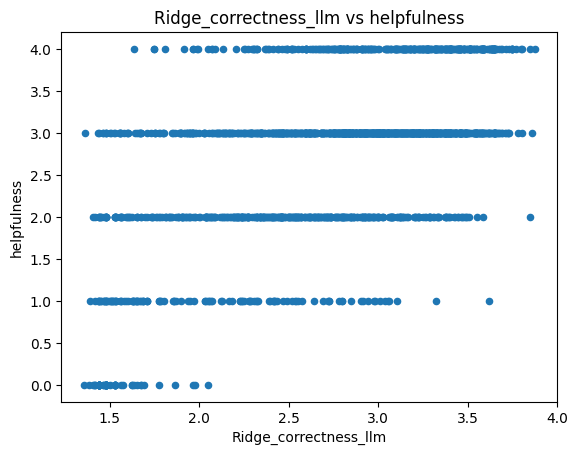

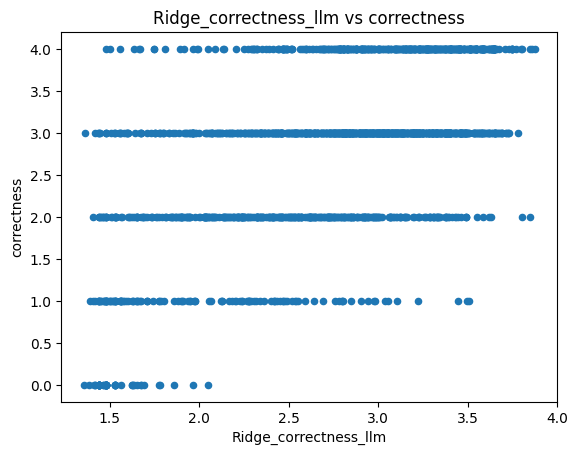

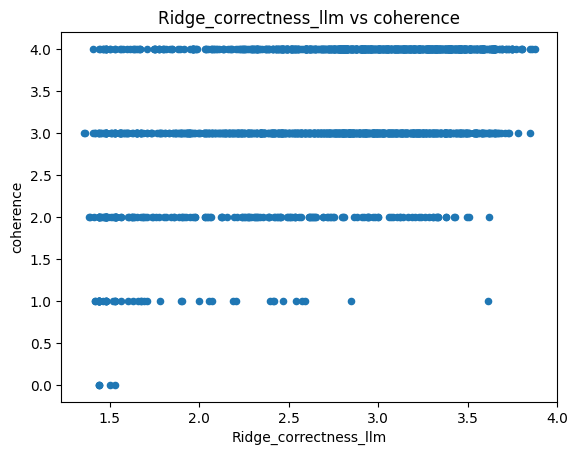

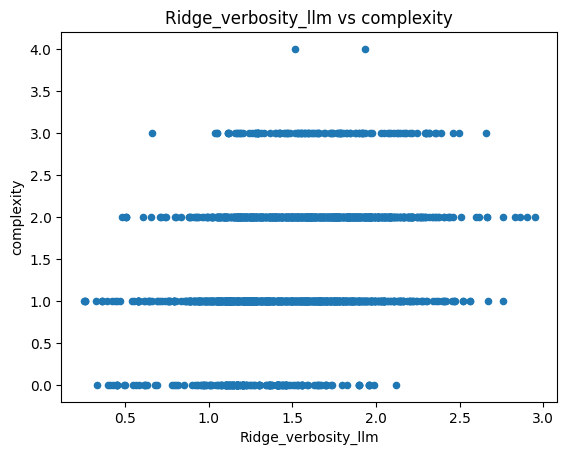

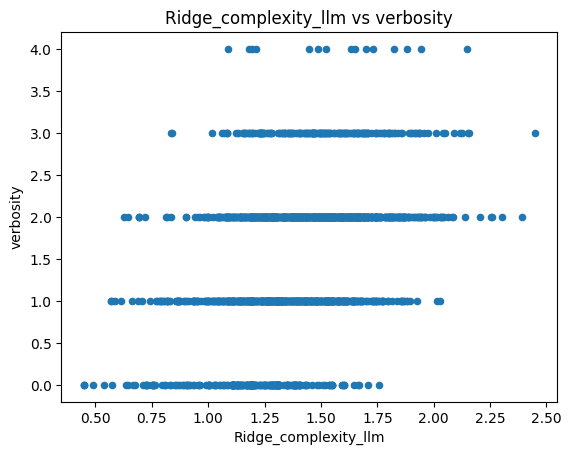

In [17]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
